In [1]:
import numpy as np
import pandas as pd
import math   as m
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r"C:\Users\barho\Downloads\archive (22)\Life Expectancy Data.csv")

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
897,Ethiopia,2000,Developing,51.2,391.0,253,0.88,11.594818,NaN,1660,...,55.0,4.36,3.0,5.0,123.876257,66537331.0,11.9,11.8,0.000,3.9
1621,Mali,2012,Developing,57.2,27.0,53,0.01,96.546583,66.0,341,...,72.0,6.47,66.0,1.5,777.347687,16667.0,8.3,8.1,0.411,7.7
300,Bhutan,2003,Developing,63.3,273.0,1,0.52,19.156641,95.0,0,...,96.0,4.90,95.0,0.2,997.741714,623434.0,18.3,19.1,0.000,8.4
455,Cabo Verde,2008,Developing,72.4,124.0,0,4.16,360.620882,98.0,0,...,99.0,3.96,99.0,0.4,3638.959460,491723.0,7.8,7.8,0.615,12.2
2648,Tonga,2000,Developing,71.6,158.0,0,1.24,40.491289,93.0,0,...,91.0,4.75,91.0,0.1,263.272360,9882.0,0.1,0.1,0.676,13.7
723,Democratic Republic of the Congo,2013,Developing,58.8,272.0,238,0.01,0.000000,74.0,88381,...,74.0,3.89,74.0,1.2,NaN,NaN,9.9,9.6,NaN,NaN
1535,Lithuania,2002,Developed,71.4,22.0,0,11.00,561.916864,94.0,103,...,97.0,6.40,95.0,0.1,4146.987928,344367.0,3.3,3.3,0.770,15.3
2635,Tonga,2013,Developing,73.2,137.0,0,0.01,584.944989,82.0,0,...,84.0,4.98,82.0,0.1,4266.557174,15328.0,0.1,0.1,0.718,14.3
498,Canada,2013,Developing,81.8,67.0,2,8.20,9733.228019,55.0,83,...,91.0,1.67,91.0,0.1,52413.721160,35155451.0,0.5,0.5,0.909,15.9
2751,United Arab Emirates,2010,Developing,76.2,82.0,1,1.69,308.066074,94.0,87,...,94.0,3.93,94.0,0.1,3549.148320,NaN,5.1,4.9,0.826,13.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


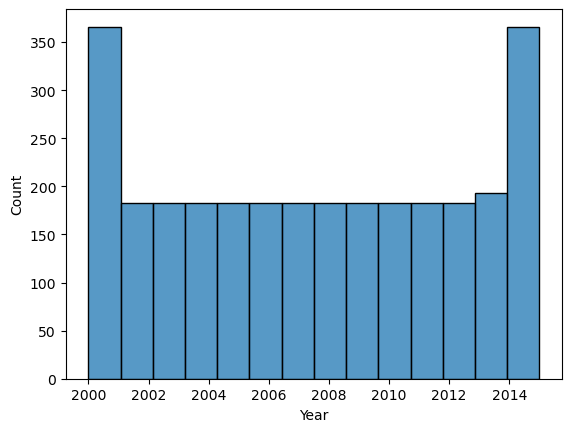

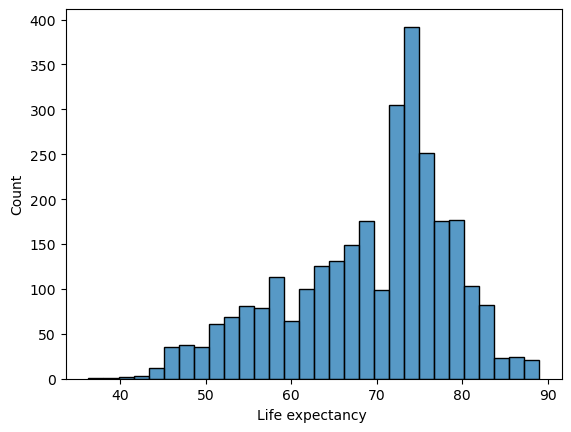

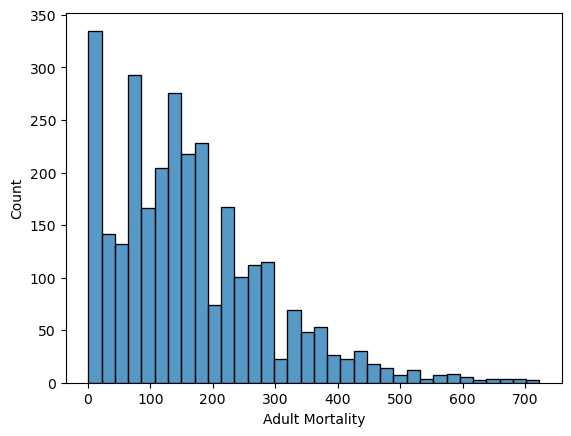

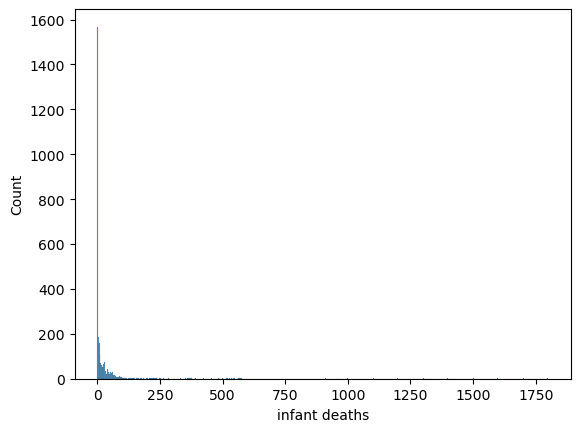

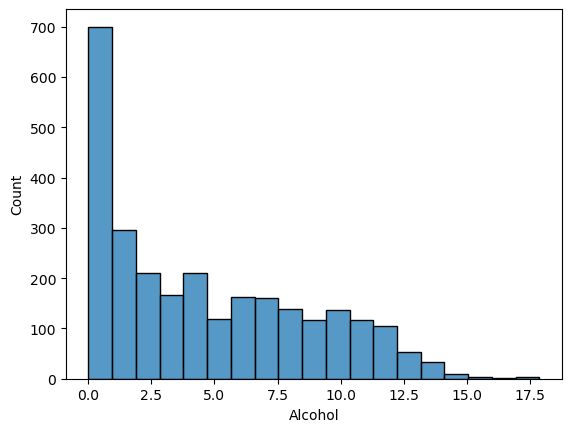

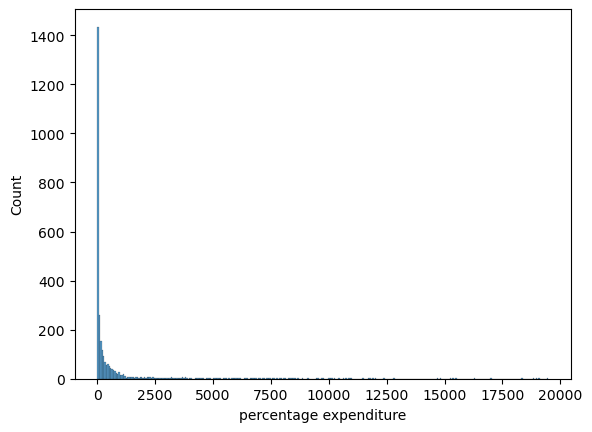

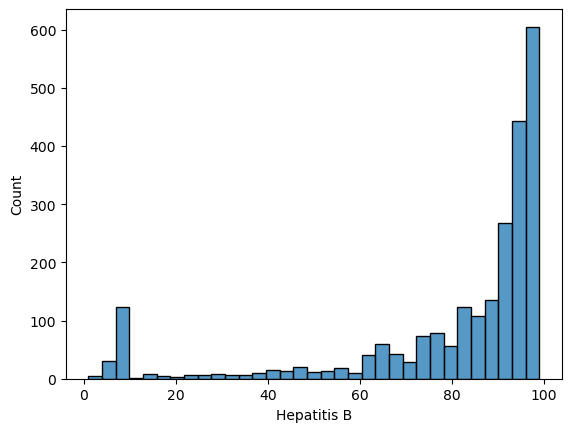

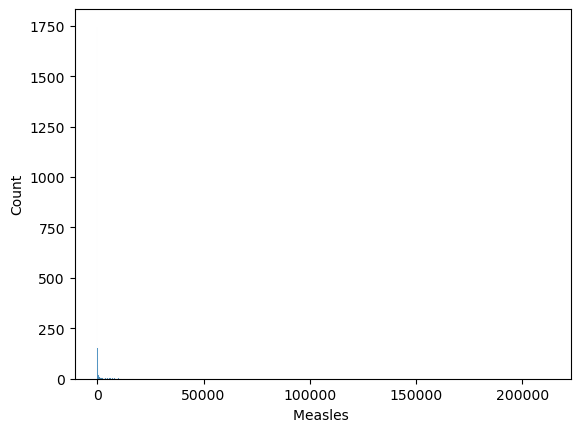

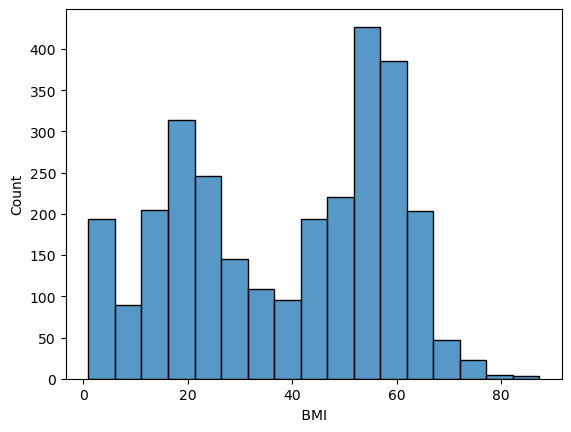

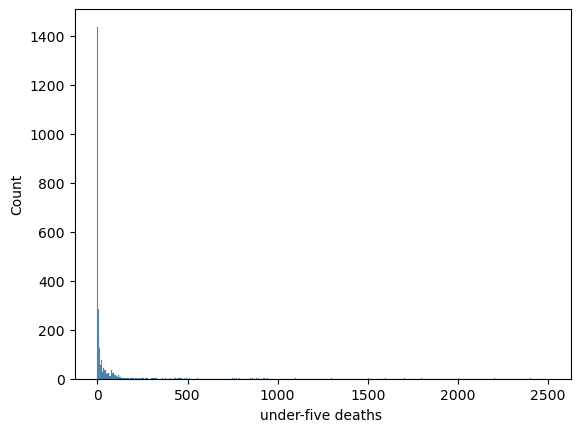

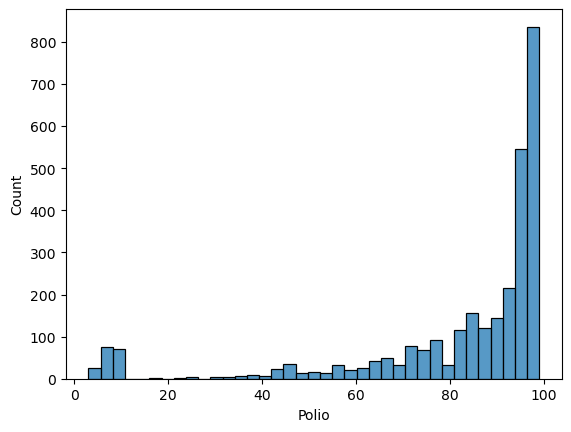

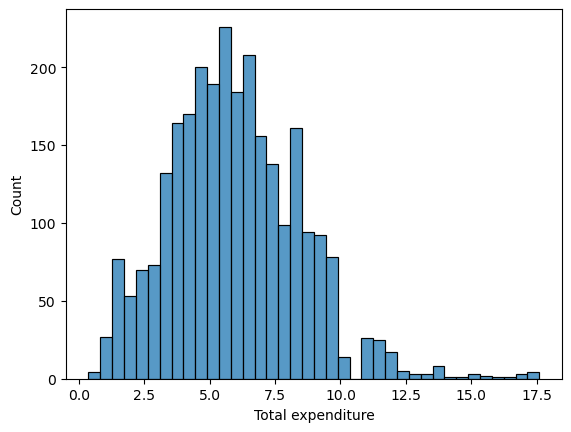

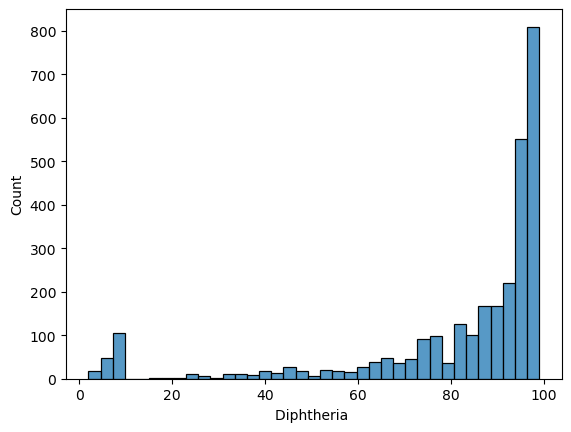

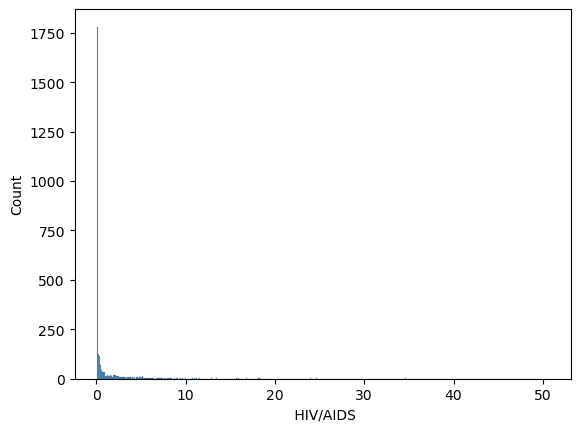

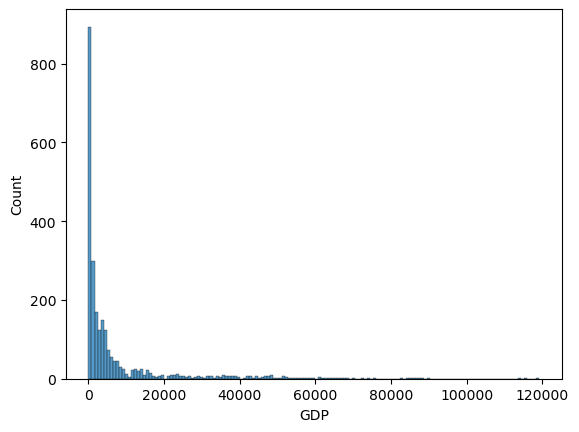

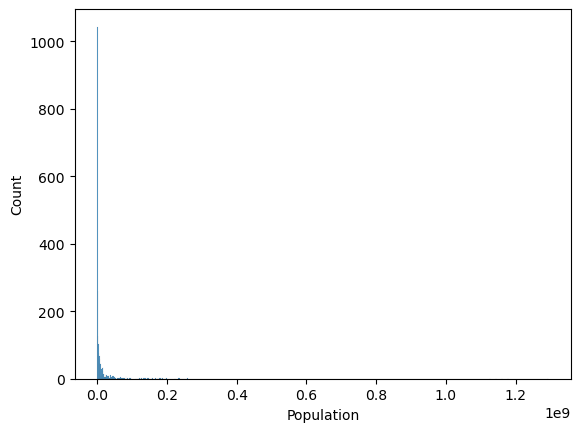

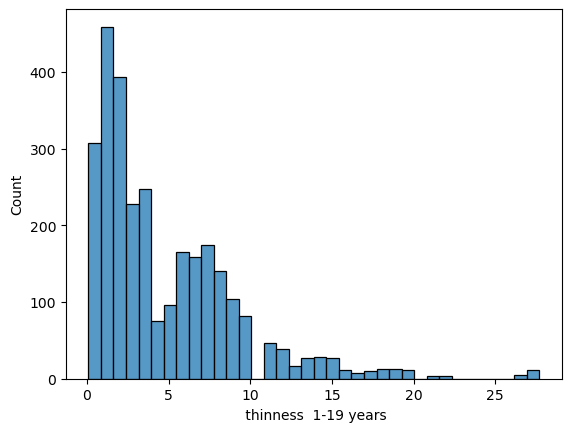

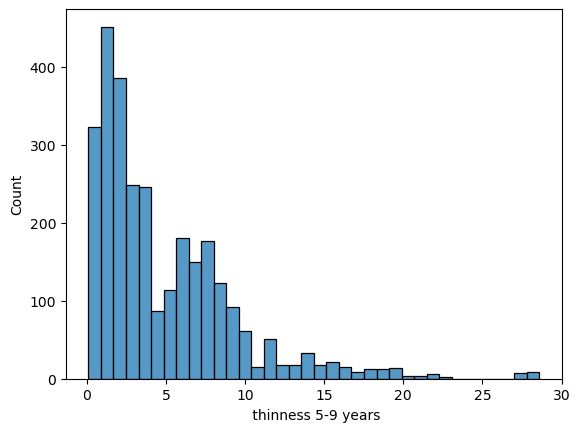

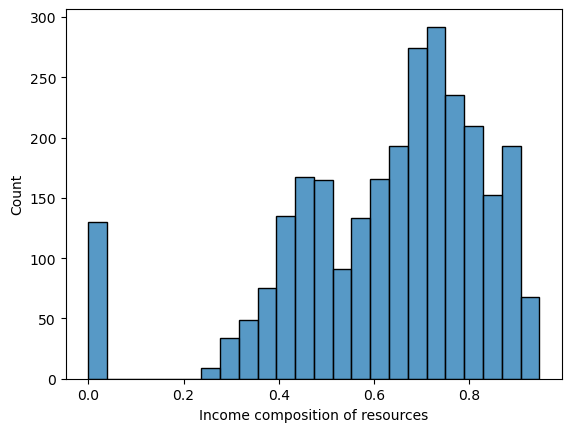

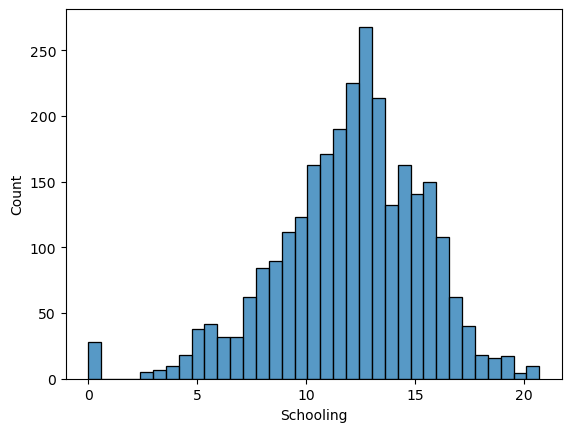

In [9]:
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()

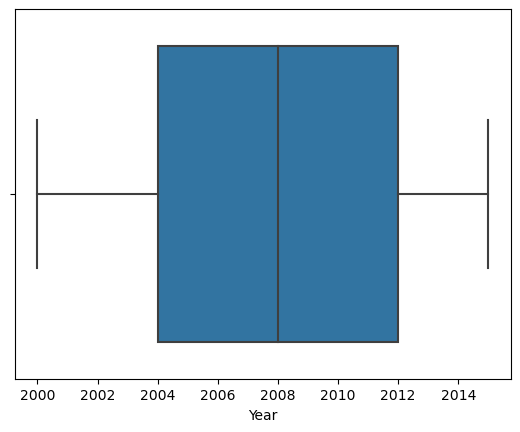

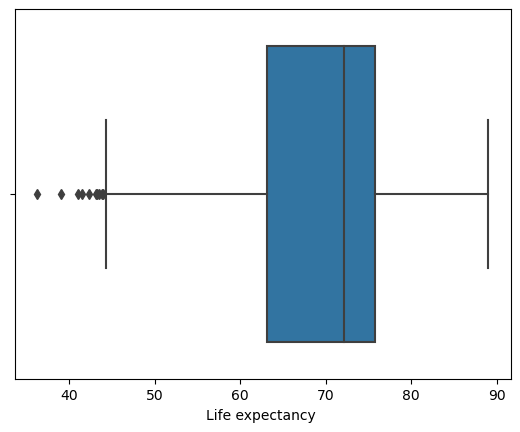

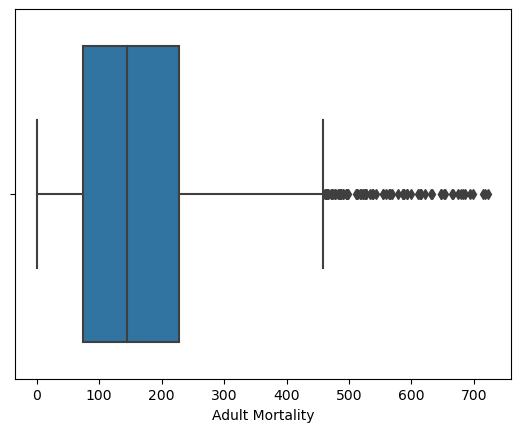

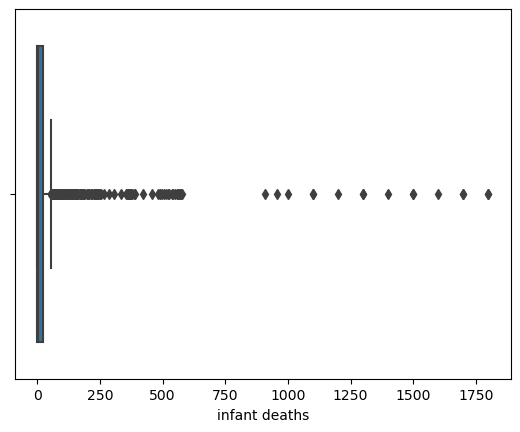

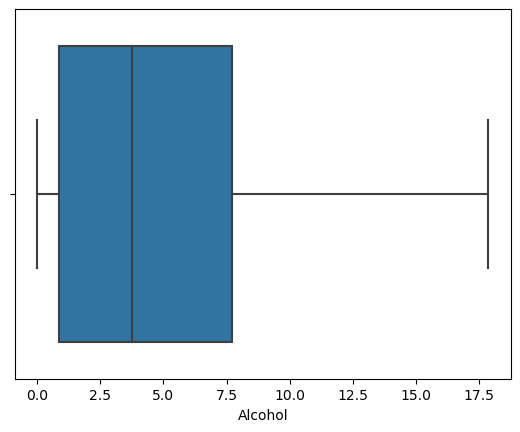

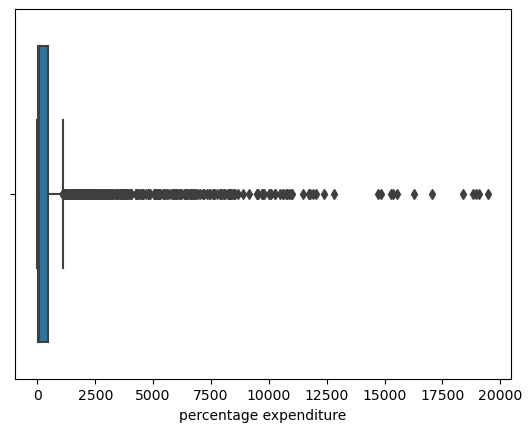

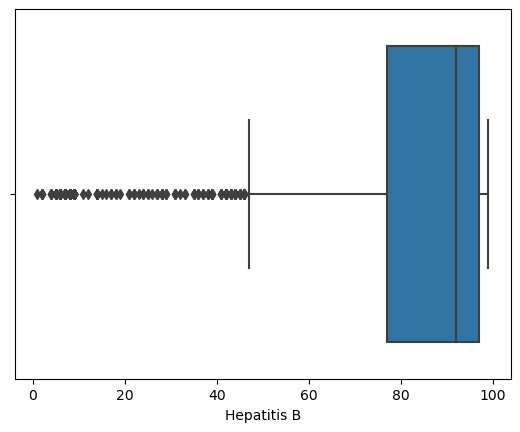

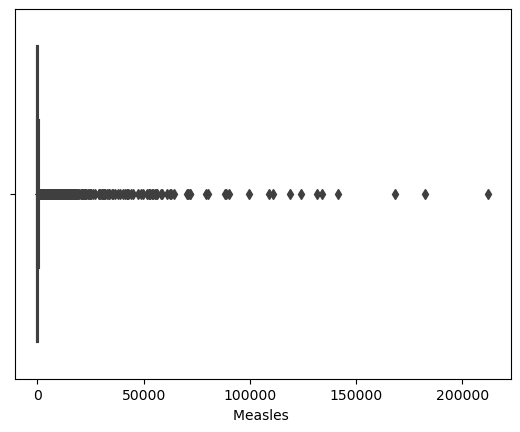

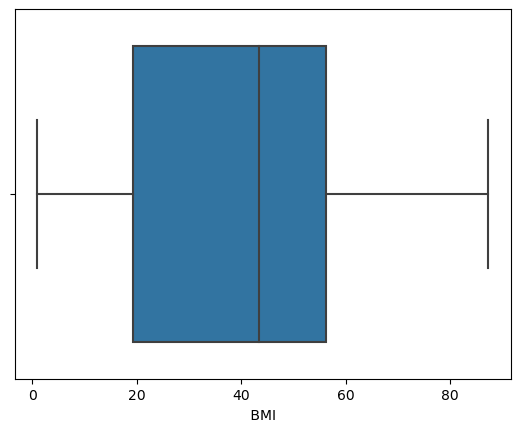

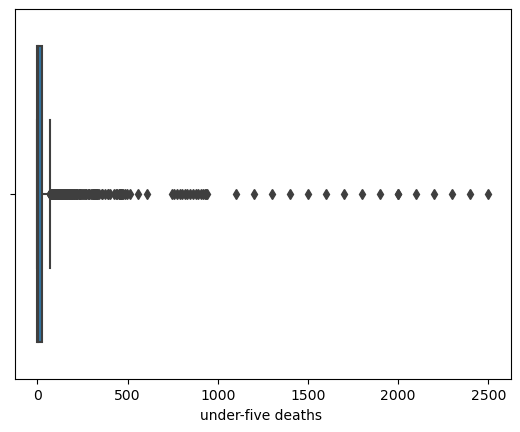

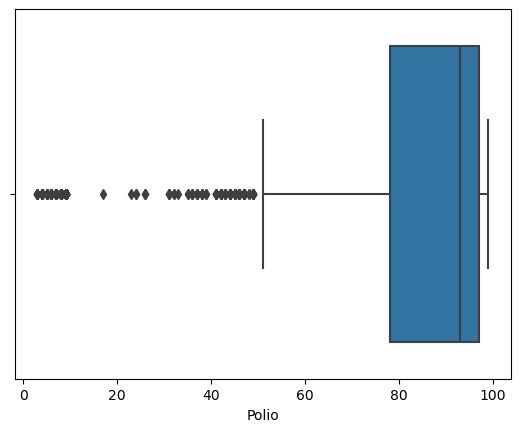

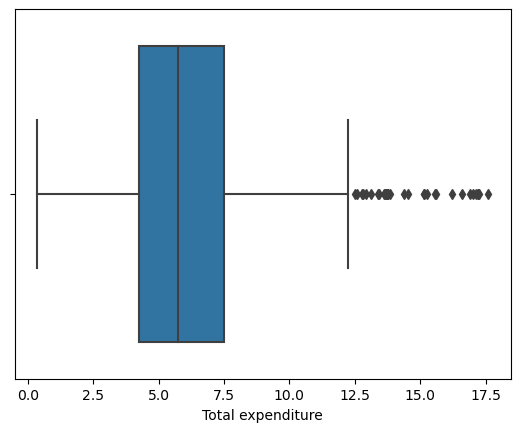

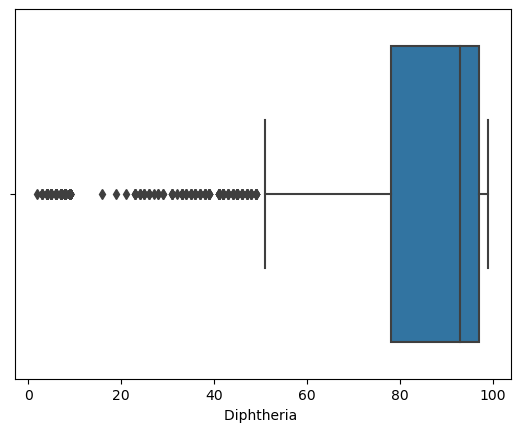

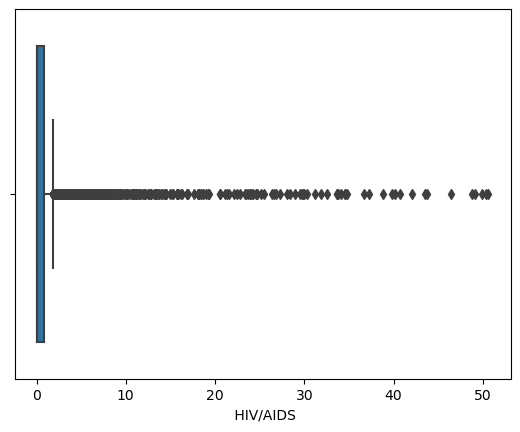

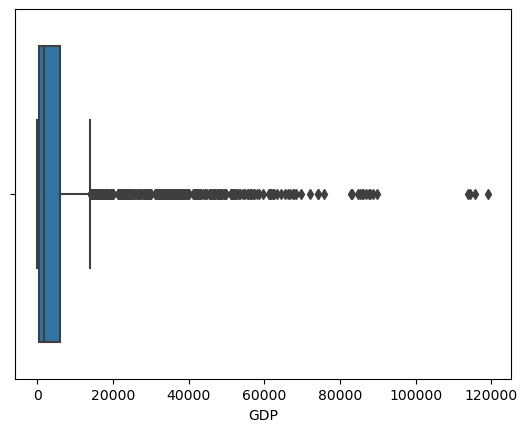

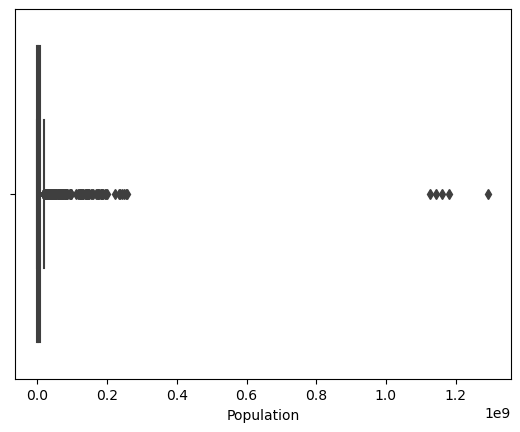

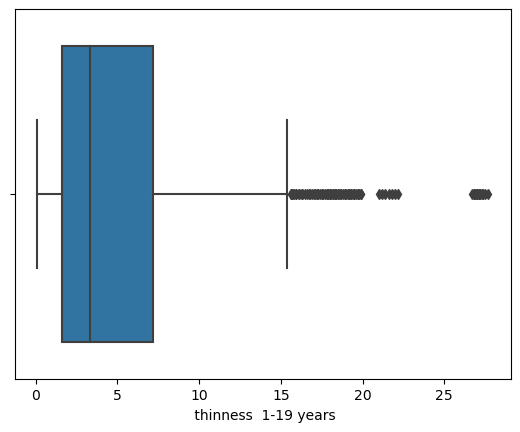

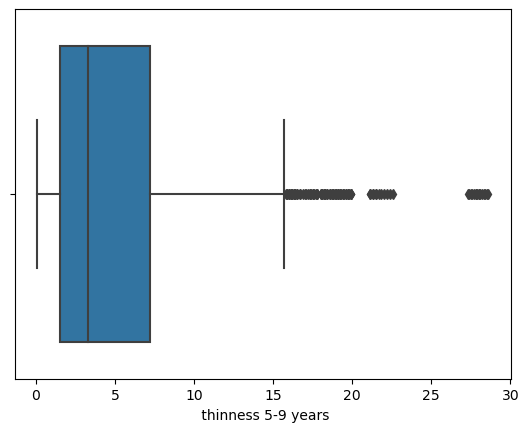

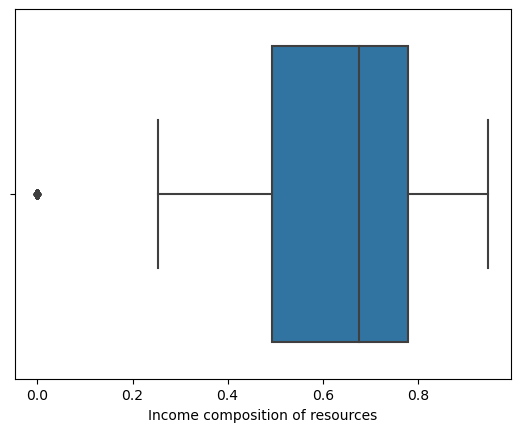

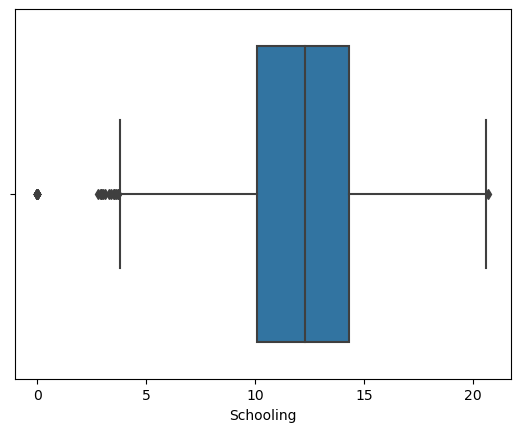

In [10]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

C:\Users\barho\AppData\Local\Temp\ipykernel_43184\2191331676.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,)


<Axes: >

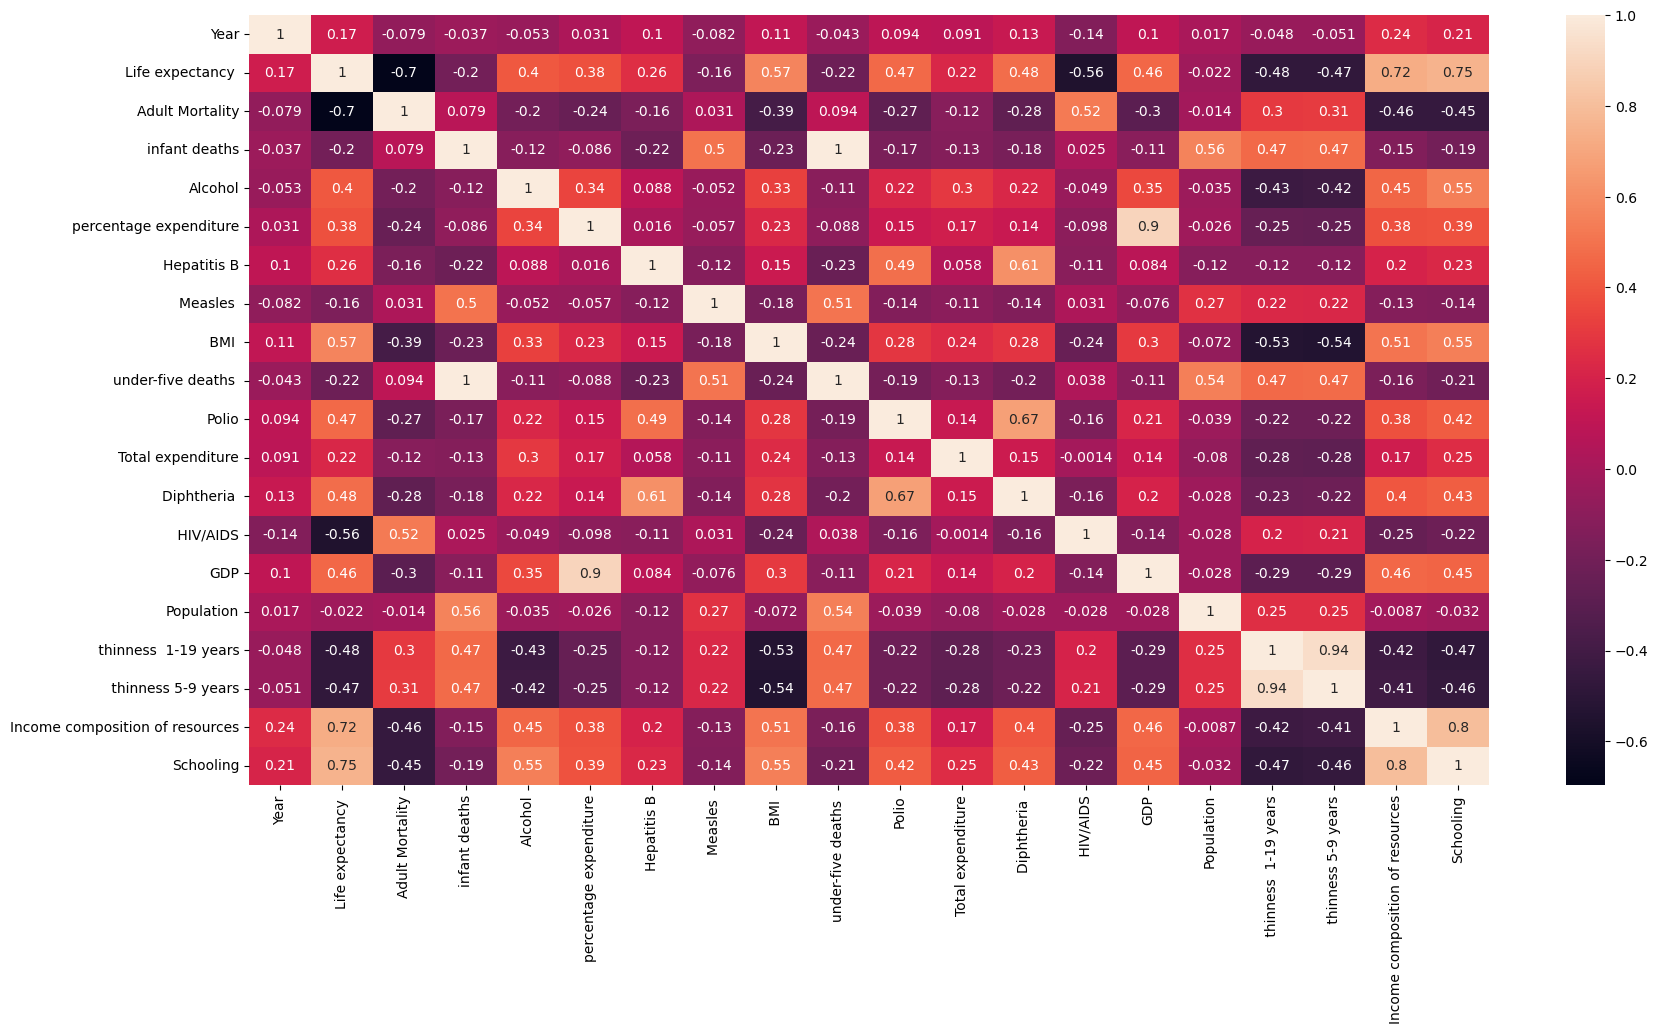

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,)


In [12]:
from sklearn.impute import KNNImputer
impute=KNNImputer()



In [13]:
for i in df.select_dtypes(include='number').columns:
    df[i]=impute.fit_transform(df[[i]])

In [14]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [15]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [16]:
x=df[['Alcohol','percentage expenditure','Hepatitis B',' BMI ','Polio','Total expenditure','Diphtheria ','GDP','Income composition of resources', 'Schooling']]
y=df[['Life expectancy ']]

In [17]:
y.head()

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2


In [18]:
from sklearn.model_selection import train_test_split


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaler=scaler.fit_transform(x)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()

In [22]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score


In [23]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    
    
    print(f"R2 Score =  {r2_score(y_test,pre) * 100:.2f}%")
    print('Mean Absolute Error = ',mean_absolute_error(y_test, pre))
    print('Mean Squared Error = ',mean_squared_error(y_test, pre))
    print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, pre)))
    
    # Scatter plot for real and predict data
    plt.scatter(y_test,pre)
    return model

R2 Score =  67.39%
Mean Absolute Error =  3.852392682050294
Mean Squared Error =  28.25198819488303
Root Mean Squared Error =  5.315259936718338


LinearRegression()

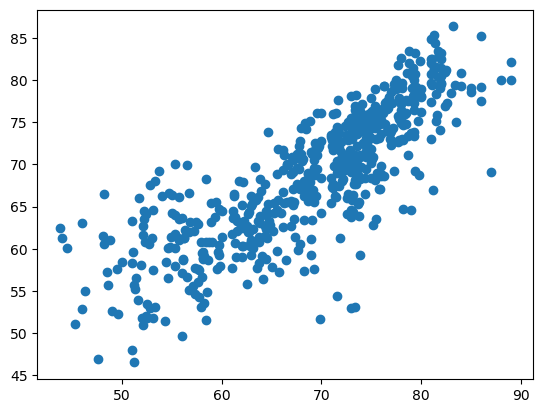

In [25]:
cal(model1)

R2 Score =  80.96%
Mean Absolute Error =  2.329506570387718
Mean Squared Error =  16.4981460261859
Root Mean Squared Error =  4.0617909875061144


DecisionTreeRegressor()

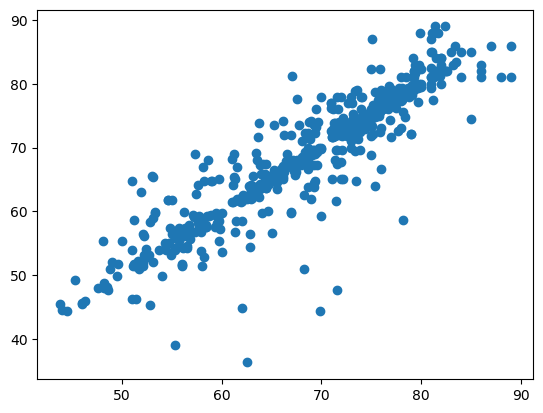

In [26]:
cal(model2)

C:\Users\barho\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2 Score =  90.94%
Mean Absolute Error =  1.876307026583845
Mean Squared Error =  7.850258648342003
Root Mean Squared Error =  2.801831302620128


RandomForestRegressor()

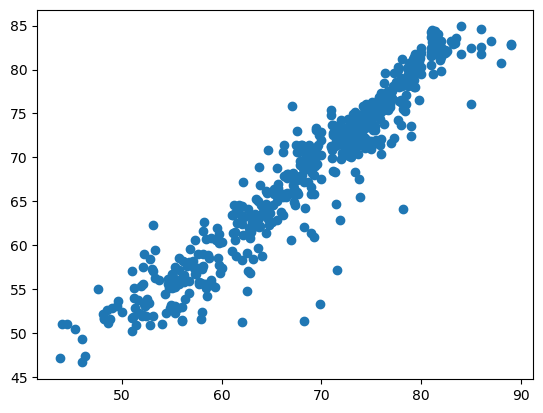

In [27]:
cal(model3)